<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-handbook/blob/master/ml-algorithms/Linear_Regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Linear Regression

Inspired by [Homemade Machine Learning](https://github.com/trekhleb/homemade-machine-learning)

## Package setup

In [417]:
!pip install plotly

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [418]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 8]
%config InlineBackend.figure_format = 'retina'
sns.set()
# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

## Univariate regression: planar data

x: (50,)
y: (50,)


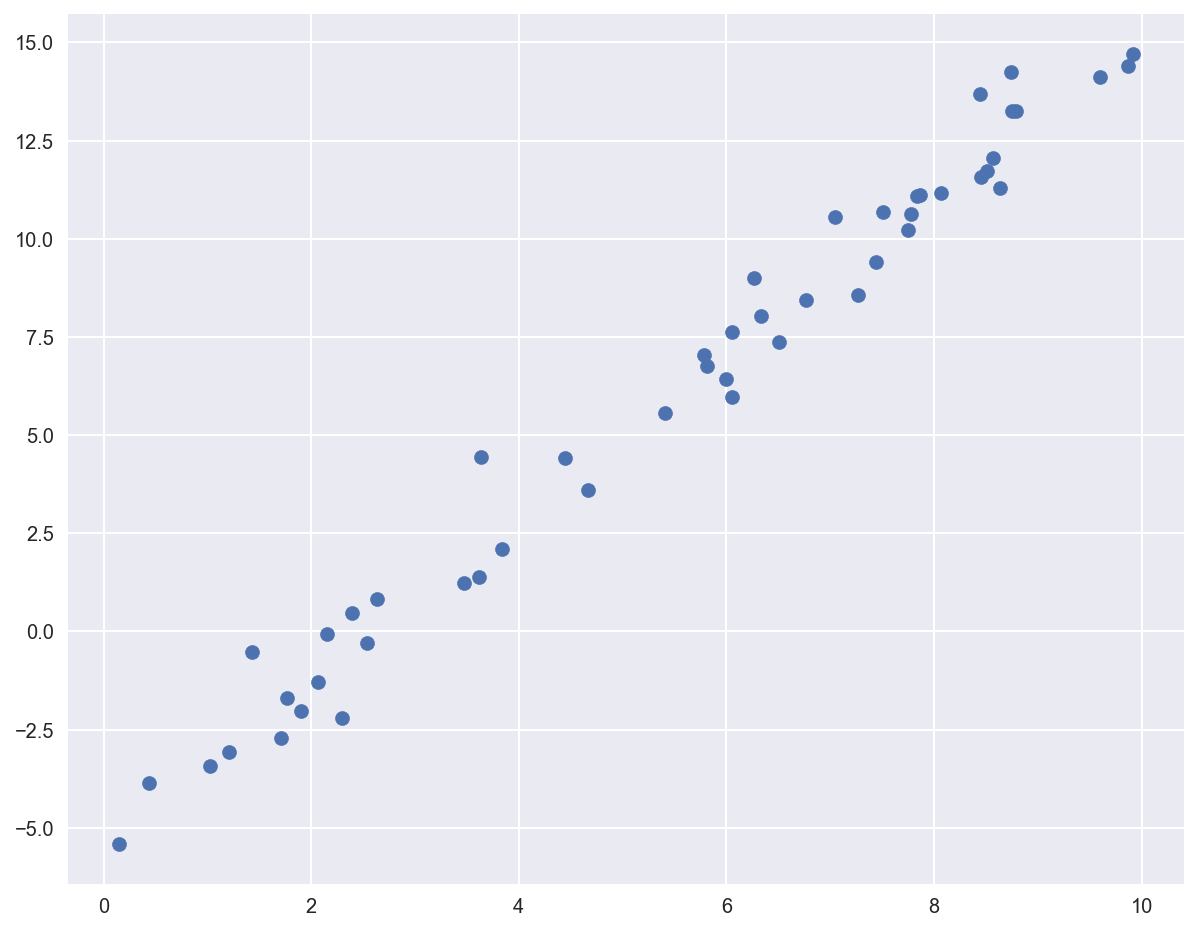

In [419]:
# Generate some linear-looking data
x = 10 * np.random.rand(50)
print(f'x: {x.shape}')
y = 2 * x - 5 + np.random.randn(50)
print(f'y: {y.shape}')
plt.scatter(x, y)
plt.show()

In [420]:
# Create input matrix (2D array) with data on first axis
x_train = x[:, np.newaxis]
print(f'x_train: {x_train.shape}')
y_train = y

x_train: (50, 1)


In [421]:
# Train a linear regressor on data
model = SGDRegressor(loss="squared_loss", penalty="none", max_iter=300)
model.fit(x_train, y_train)

# Print slope and intercept values
print(f'Model slope: {model.coef_[0]}')
print(f'Model intercept: {model.intercept_[0]}')

Model slope: 2.030228113631237
Model intercept: -5.13776705967538


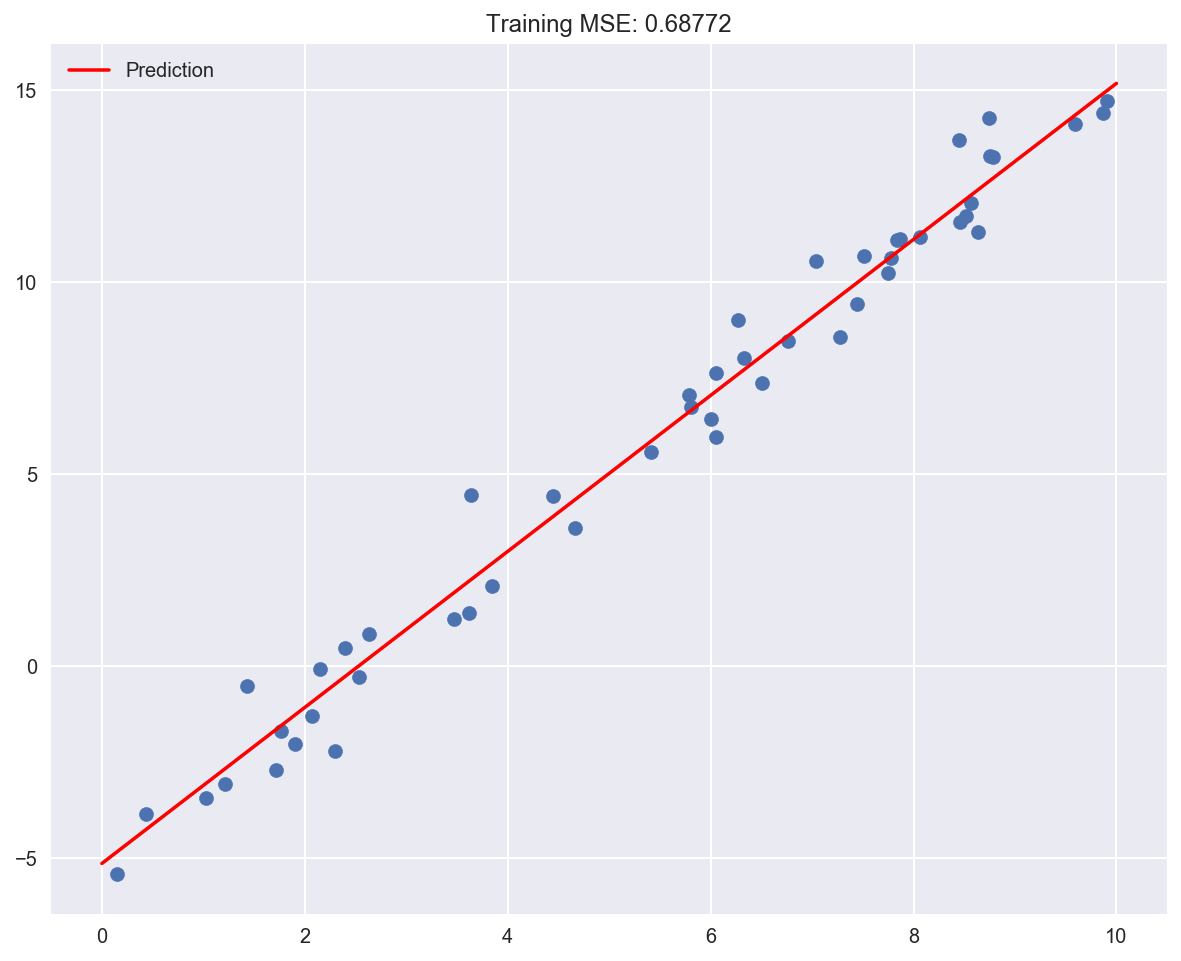

In [422]:
# Calculate MSE loss
y_pred = model.predict(x_train)
mse = mean_squared_error(y, y_pred)

# Plot data
plt.scatter(x, y)

# Plot best-fit line
x_fit = np.linspace(0, 10, 1000)
y_fit = model.predict(x_fit[:, np.newaxis])
plt.title(f"Training MSE: {mse:.5g}")
plt.plot(x_fit, y_fit, color='red', label='Prediction')

plt.legend()
plt.show()

## Univariate regression: country happiness by GDP

In [423]:
# Import World Happiness dataset for 2017
# https://www.kaggle.com/unsdsn/world-happiness#2017.csv
df_wh = pd.read_csv('../datasets/world-happiness-report-2017.csv')

# Display the first 10 rows
df_wh.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

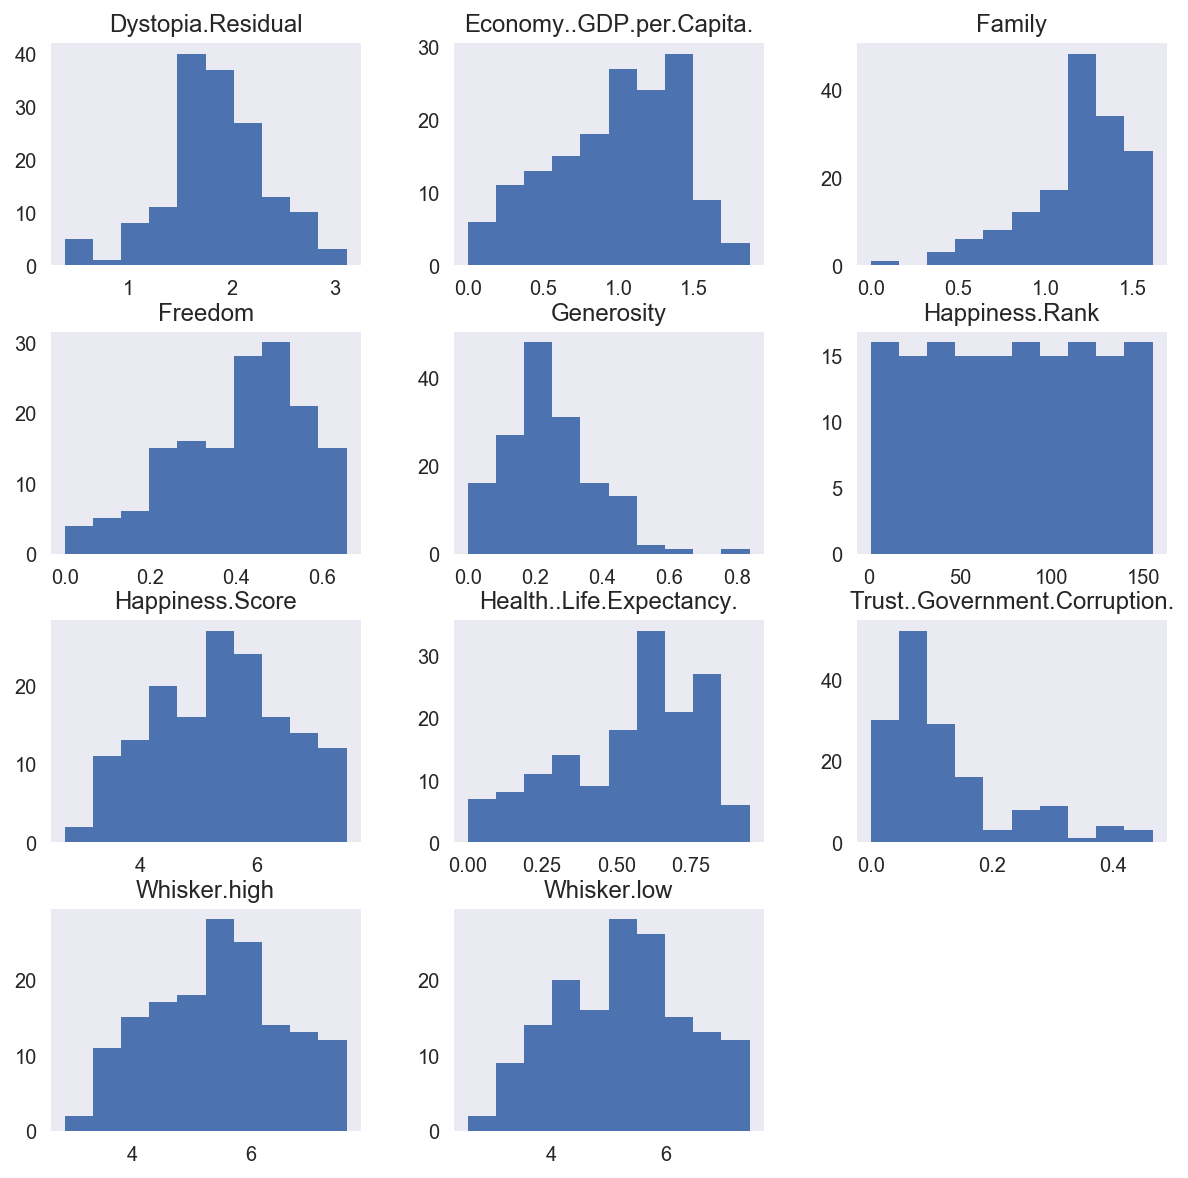

In [424]:
# Print histograms for each feature to see how they vary.
histogram = df_wh.hist(grid=False, figsize=(10, 10))

In [425]:
# Define selected fields (feetures and label)
feature_columns = ['Economy..GDP.per.Capita.']
label_column = 'Happiness.Score'

# Keep only selected fields
x = df_wh[feature_columns].values
# Transform column matrix (2D tensor) into vector: needed for sk-learn
y = np.squeeze(df_wh[[label_column]].values)

# Split data between training and test (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

x_train: (124, 1). y_train: (124,)
x_test: (31, 1). y_test: (31,)


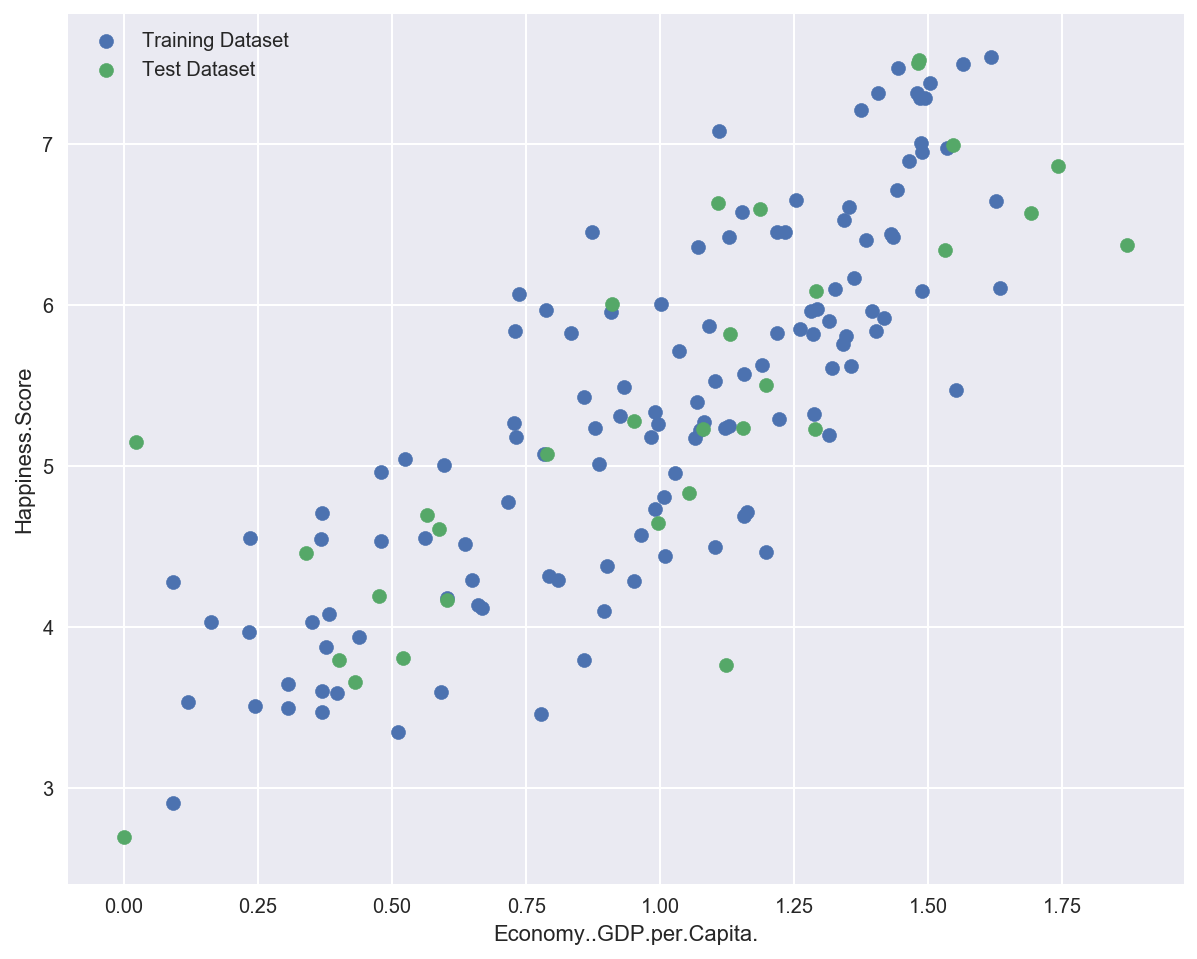

In [426]:
# Plot data
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.legend()
plt.show()

In [427]:
# Train a linear regressor
model = SGDRegressor(loss="squared_loss", penalty="none", max_iter=500)
model.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=500, n_iter=None, penalty='none',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

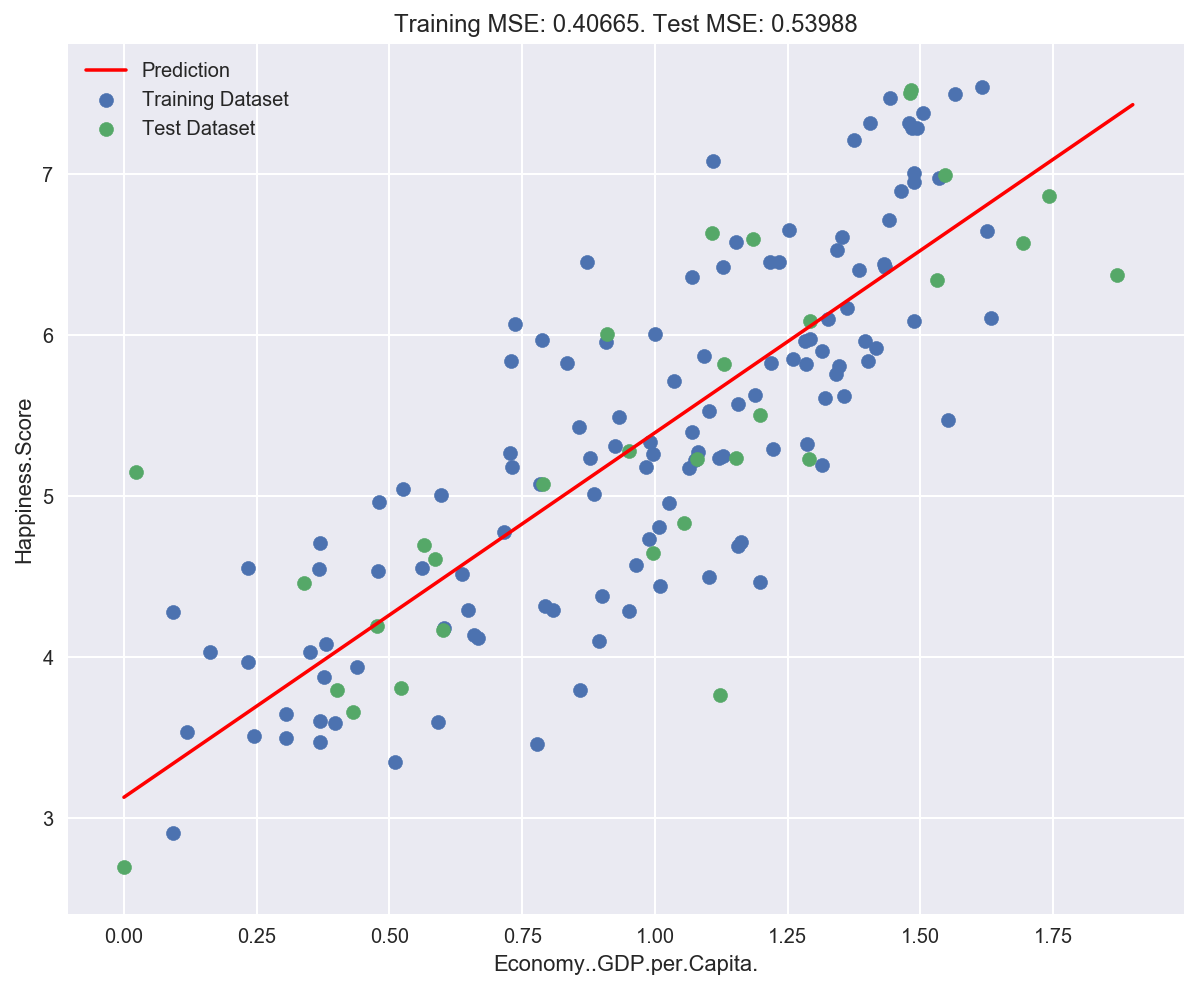

In [428]:
# Calculate MSE loss on training data
mse_train = mean_squared_error(y_train, model.predict(x_train))
# Calculate MSE loss for test data
mse_test = mean_squared_error(y_test, model.predict(x_test))

# Plot data
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)

# Plot best-fit line
x_fit = np.linspace(0, 1.9, 200)
y_fit = model.predict(x_fit[:, np.newaxis])
plt.plot(x_fit, y_fit, color='red', label='Prediction')
plt.title(f'Training MSE: {mse_train:.5g}. Test MSE: {mse_test:.5g}')

plt.legend()
plt.show()

In [429]:
# Display expected and actual happiness scores for 10 test samples
y_pred_test = model.predict(x_test)
df_y_pred = pd.DataFrame({
    'Actual Happiness Score': y_test.flatten(),
    'Predicted Happiness Score': y_pred_test.flatten(),
    'Diff': (y_test - y_pred_test).flatten()
})
df_y_pred.sample(n=10)

Actual Happiness Score      Diff  Predicted Happiness Score
11                   4.608  0.151261                   4.456739
14                   7.522  1.037159                   6.484841
25                   4.190 -0.016532                   4.206532
21                   4.460  0.563551                   3.896449
19                   2.693 -0.435334                   3.128334
6                    5.230 -0.342322                   5.572322
22                   5.279 -0.003746                   5.282746
18                   6.993  0.363526                   6.629474
26                   4.695  0.288930                   4.406070
1                    5.234 -0.506393                   5.740393

## Multivariate regression: country happiness by GDP and freedom

In [430]:
# Define selected fields (feetures and label)
feature_columns = ['Economy..GDP.per.Capita.', 'Freedom']
label_column = 'Happiness.Score'

# Keep only selected fields
x = df_wh[feature_columns].values
# Transform column matrix (2D tensor) into vector: needed for sk-learn
y = np.squeeze(df_wh[[label_column]].values)

# Split data between training and test (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

x_train: (124, 2). y_train: (124,)
x_test: (31, 2). y_test: (31,)


In [431]:
# Configure the plot with training dataset.
plot_training_trace = go.Scatter3d(
    x=x_train[:, 0].flatten(),
    y=x_train[:, 1].flatten(),
    z=y_train.flatten(),
    name='Training Set',
    mode='markers',
    marker={
        'size': 10,
        'opacity': 1,
        'line': {
            'color': 'rgb(255, 255, 255)',
            'width': 1
        },
    }
)

# Configure the plot with test dataset.
plot_test_trace = go.Scatter3d(
    x=x_test[:, 0].flatten(),
    y=x_test[:, 1].flatten(),
    z=y_test.flatten(),
    name='Test Set',
    mode='markers',
    marker={
        'size': 10,
        'opacity': 1,
        'line': {
            'color': 'rgb(255, 255, 255)',
            'width': 1
        },
    }
)

# Configure the layout.
plot_layout = go.Layout(
    title='Date Sets',
    scene={
        'xaxis': {'title': feature_columns[0]},
        'yaxis': {'title': feature_columns[1]},
        'zaxis': {'title': label_column} 
    },
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

In [432]:
# Render 3D scatter plot
plot_data = [plot_training_trace, plot_test_trace]
plot_figure = go.Figure(data=plot_data, layout=plot_layout)
plotly.offline.iplot(plot_figure)

In [433]:
# Train a linear regressor
model = SGDRegressor(loss="squared_loss", penalty="none", max_iter=500)
model.fit(x_train, y_train)

# Calculate MSE loss on training and test data
mse_train = mean_squared_error(y_train, model.predict(x_train))
mse_test = mean_squared_error(y_test, model.predict(x_test))
print(f'Training MSE: {mse_train:.5g}. Test MSE: {mse_test:.5g}')

Training MSE: 0.32656. Test MSE: 0.33848


In [434]:
# Generate different combinations of X and Y sets to build a predictions plane.
predictions_num = 10

# Find min and max values along X and Y axes.
x_min = x_train[:, 0].min();
x_max = x_train[:, 0].max();

y_min = x_train[:, 1].min();
y_max = x_train[:, 1].max();

# Generate predefined numbe of values for eaxh axis betwing correspondent min and max values.
x_axis = np.linspace(x_min, x_max, predictions_num)
y_axis = np.linspace(y_min, y_max, predictions_num)

# Create empty vectors for X and Y axes predictions
# We're going to find cartesian product of all possible X and Y values.
x_predictions = np.zeros((predictions_num * predictions_num, 1))
y_predictions = np.zeros((predictions_num * predictions_num, 1))

# Find cartesian product of all X and Y values.
x_y_index = 0
for x_index, x_value in enumerate(x_axis):
    for y_index, y_value in enumerate(y_axis):
        x_predictions[x_y_index] = x_value
        y_predictions[x_y_index] = y_value
        x_y_index += 1

# Predict Z value for all X and Y pairs. 
z_predictions = model.predict(np.hstack((x_predictions, y_predictions)))

# Plot training data with predictions.

# Configure the plot with test dataset.
plot_predictions_trace = go.Scatter3d(
    x=x_predictions.flatten(),
    y=y_predictions.flatten(),
    z=z_predictions.flatten(),
    name='Prediction Plane',
    mode='markers',
    marker={
        'size': 1,
    },
    opacity=0.8,
    surfaceaxis=2, 
)

In [435]:
# Render 3D scatter plot with prediction plane
plot_data = [plot_training_trace, plot_test_trace, plot_predictions_trace]
plot_figure = go.Figure(data=plot_data, layout=plot_layout)
plotly.offline.iplot(plot_figure)

In [436]:
# Display expected and actual happiness scores for 10 test samples
y_pred_test = model.predict(x_test)
df_y_pred = pd.DataFrame({
    'Actual Happiness Score': y_test.flatten(),
    'Predicted Happiness Score': y_pred_test.flatten(),
    'Diff': (y_test - y_pred_test).flatten()
})
df_y_pred.sample(n=10)

Actual Happiness Score      Diff  Predicted Happiness Score
20                   7.537  0.549684                   6.987316
24                   6.084  0.160902                   5.923098
11                   5.336 -0.049412                   5.385411
5                    5.872  0.651187                   5.220814
7                    6.003  0.744511                   5.258489
18                   5.500 -0.051932                   5.551932
26                   5.273 -0.387678                   5.660678
12                   5.181  0.424158                   4.756842
15                   3.808 -0.633673                   4.441673
25                   3.593 -0.711215                   4.304215